# 2022-01-12 Taylor Series

Suppose we wish to sum the series

$$ \sum_{n=1}^{\infty} \frac{1}{n^2} = 1 + \frac{1}{2^2} + \frac{1}{3^2} + \frac{1}{4^2} + \dotsb . $$

We can't sum infinitely many terms, but we can write a function to sum the first $k$ terms and see what happens as we increase $k$.  That is, we'll compute

$$ y_k = \sum_{n=1}^{k} \frac{1}{n^2} $$

and estimate what happens in the limit as $k \to \infty$.

In [1]:
using Plots

function series_n2(k)
    sum = 0
    for n in 1:k
        sum += 1/n^2
    end
    return sum
end

series_n2(10)

1.5497677311665408

This particular series is [known](https://en.wikipedia.org/wiki/Pi#Irrationality_and_transcendence) to converge to $\pi^2/6$.  (Proof of this is beyond the scope of this class and it's something you can always look up.)

## How fast does it converge?

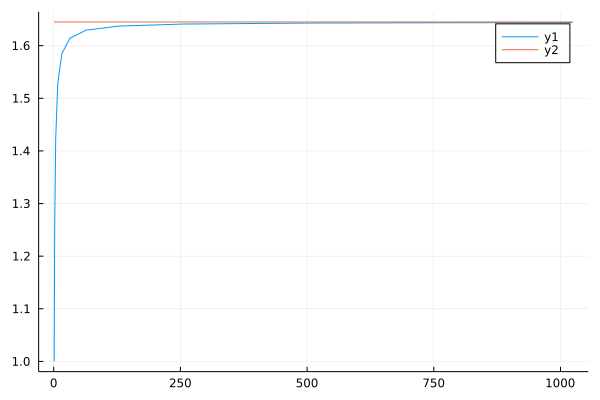

In [2]:
known_limit = pi^2/6
ks = 2 .^ (0:10)  # [1, 2, 4, ..., 1024]
plot(ks, [series_n2, k->known_limit])

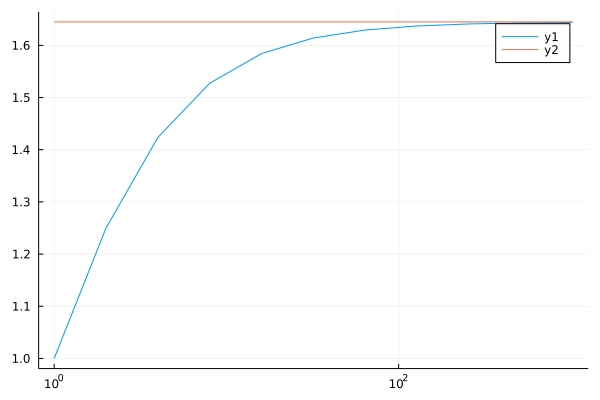

In [3]:
# More insight using a logarithmic x axis
plot(ks, [series_n2, k->known_limit], xscale=:log10)

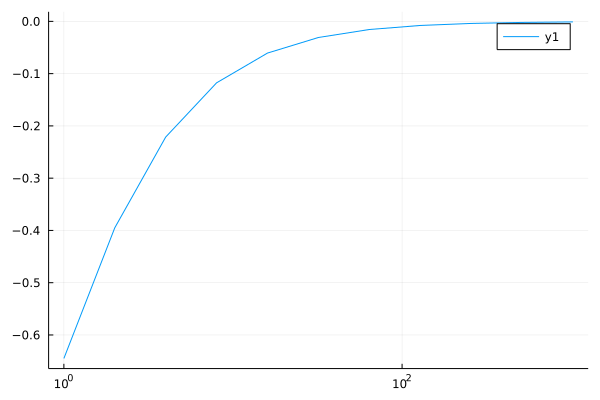

In [4]:
# Plot error from the known limit
plot(ks, k -> series_n2(k) - known_limit, xscale=:log10)

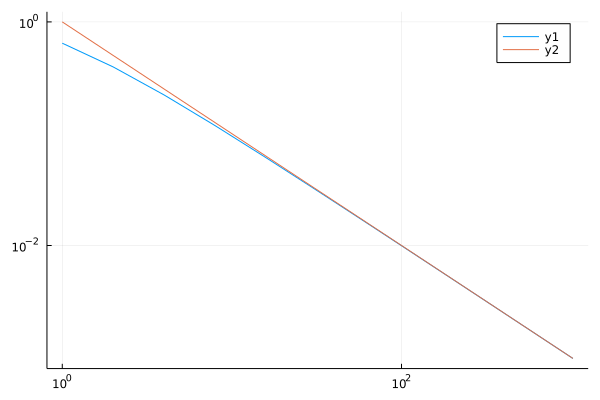

In [5]:
# Log scales are insightful when plotting (positive) errors
plot(ks,
    [k -> abs(series_n2(k) - known_limit),
     k -> 1/k],
    xscale=:log10, yscale=:log10)

### That's interesting!

This final plot suggests that the error is proportional to $1/k$, i.e.,
$$ \left\lvert \sum_{n=1}^k \frac{1}{n^2} - \pi^2/6 \right\rvert \sim \frac 1 k . $$

### Notation
The notation $f\sim g$ means that $$a g(x) \le f(x) \le b g(x)$$ for two positive numbers $a,b$ in some asymptotic regime ($x$ sufficiently large or small). The relevant limit here is large $x$ ($k$ for the series), but sometimes we'll be interested in small limits.

## Computing the exponential function

Recall that a [common definition](https://en.wikipedia.org/wiki/Exponential_function#Formal_definition) of of the exponential function is

$$ e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} . $$

We wrote a function during lecture that sums this series to approximate $e^x$. I'm including it here; please modify it to sum at most `k` terms.

### Modify this function so that at most `k` terms are summed

You can do this at the line using an `if` statement with `break`, or you can modify the `while` condition.

In [19]:
function myexp(x, k)
    sum = 0
    term = 1
    n = 1
    # modify so at most k terms are summed
    while sum + term != sum
        sum += term
        term *= x / n
        ## BEGIN SOLUTION
        if n > k
            break
        end
        ## END SOLUTION
        n += 1
    end
    sum
end

myexp(1, 100)

2.7182818284590455

### Self-check

Why does the loop terminate (before you added a criteria involving `k`)? Can you write an expression in terms of `sum`, `term`, and $\epsilon_{\text{machine}}$ that must be satisfied for the loop to terminate?

In [20]:
@assert myexp(1, 100) ≈ exp(1)

## Relative error

We say that the **relative error** in a numerical algorithm $\tilde f(x)$ that approximates $f(x)$ is
$$ \frac{\lvert \tilde f(x) - f(x) \rvert}{\lvert f(x) \rvert}. $$

In [21]:
rel_error(x, k) = abs(myexp(x, k) - exp(x)) / exp(x)
rel_error(1, 20)

1.6337129034990842e-16

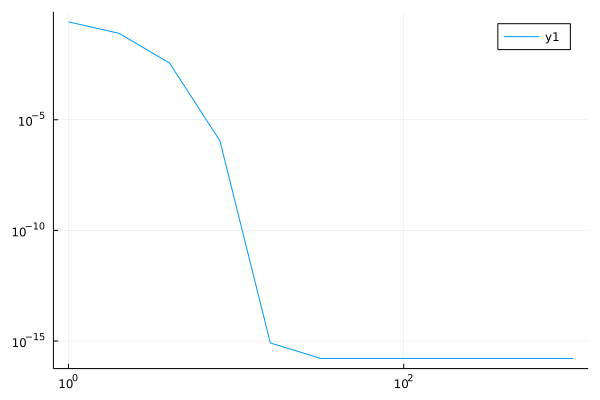

In [23]:
# Plot the relative error in myexp(1, k) as k increases
plot(ks, k -> rel_error(1, k), xscale=:log10, yscale=:log10)

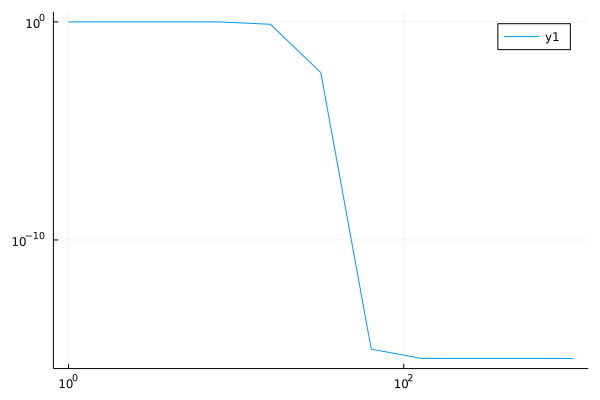

In [24]:
# Plot the relative error in myexp(20, k) as k increases
plot(ks, k -> rel_error(20, k), xscale=:log10, yscale=:log10)

## Plot the relative error in `myexp(-20, k)` as `k` increases

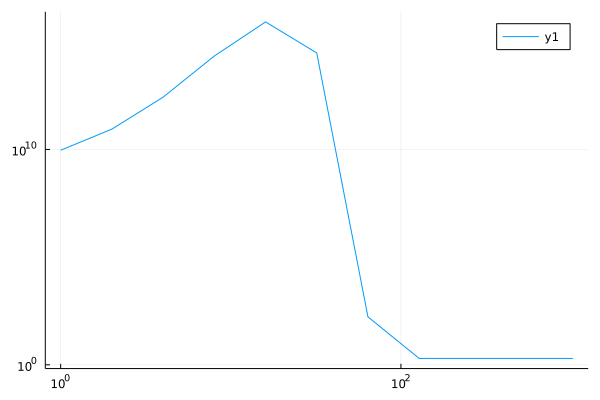

In [26]:
# BEGIN SOLUTION
plot(ks, k -> rel_error(-20, k), xscale=:log10, yscale=:log10)
# END SOLUTION

## Wow, it gets really bad before it converges.

How accurate is the final result?

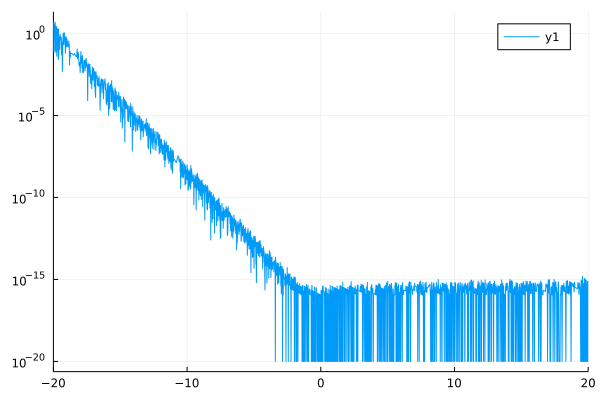

In [28]:
bottom = 1e-20 # To avoid having the plotter attempt log(0)
plot(x -> rel_error(x, 1000) + bottom, xlims=(-20, 20), yscale=:log10)

## Suggested exploration

1. Plot each of the terms in the series expansion for computing $e^{-20}$.
    * Where are rounding errors committed? Think about the size of those terms and the size of the final result ($e^{-20}$ is a small number).
    * How would you explain the large relative errors using the concept of conditioning?
    * How is this different from a positive argument, as when computing $e^{20}$?

2. Use the identity $e^{-x} = 1/e^x$ to write a new function that calls `myexp()` and is accurate for both positive and negative arguments `x`.

3. Use the identity $e^{x} = (e^{x/2})^2$ to reduce the number of terms that need to be summed. Recall that squaring is easy -- it's just multiplication.